# Exploratory Analysis of Loan Data from Prosper
## by Jyothi Rupa S

## Investigation Overview

In this investigation, I wanted to look at the variables associated with loans that could be used to predict their borrower APR (Annual Percentage Rate). The main focus was on the following variables: loan_original_amount, prosper_rating and employment_status.

## Dataset Overview

There are 113,937 records, one for each of the loans in the dataset with 81 features out of which we have retained 11 features in order to limit the scope of the analysis. Many records were removed from the dataset during data wrangling step.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_data = pd.read_csv('prosperLoanData.csv', index_col=None)

In [3]:
# retaining only the required columns in the dataframe
loan_data = loan_data[['LoanNumber', 'LoanOriginalAmount', 'LoanOriginationQuarter', 'Term', 'LoanStatus', 'BorrowerAPR', 'ProsperRating (Alpha)', 'EmploymentStatus', 'EmploymentStatusDuration', 'StatedMonthlyIncome', 'IsBorrowerHomeowner']]
loan_data.columns = ['loan_number', 'loan_original_amount', 'loan_origination_quarter', 'term', 'loan_status', 
                     'borrower_APR', 'prosper_rating', 'employment_status', 'employment_status_duration', 
                     'stated_monthly_income', 'is_borrower_homeowner']

In [4]:
# dropping the records with missing values which cannot be imputed
loan_data_to_be_dropped = loan_data[(loan_data.prosper_rating.isnull()) & (loan_data.loan_origination_quarter.isin(['Q3 2009', 'Q4 2009', 'Q1 2010', 'Q2 2010', 'Q3 2010', 'Q4 2010']))]
loan_data.drop(loan_data_to_be_dropped.index, inplace=True)

In [5]:
# replacing null values with N/A (prosper rating not available)
loan_data.prosper_rating.fillna('N/A', inplace=True)
(loan_data[loan_data.prosper_rating == 'N/A']).count()[0]

28953

In [6]:
# converting the field to ordered categorical data type
# 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA

# ordered list of categories 
ordered_categories = ['N/A', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA']

# converting to ordered categorical field
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordered_categories)
loan_data.prosper_rating = loan_data.prosper_rating.astype(ordered_var)

In [7]:
# drop records with employment status not available
loan_data.dropna(subset=['employment_status'], inplace=True)

# converting employment status to category data type
loan_data.employment_status = loan_data.employment_status.astype('category')

# converting loan status to category data type
loan_data.loan_status = loan_data.loan_status.astype('category')

In [8]:
# getting all records where employment status is 'Not available'
loan_data_to_be_dropped = loan_data[loan_data.employment_status == "Not available"]

# dropping all records where employment status is 'Not available'
loan_data.drop(loan_data_to_be_dropped.index, inplace=True)

In [9]:
#creating a dataframe containing only those records where employment status duration is not available
emp_status_duration_na_loan_data = loan_data[loan_data.employment_status_duration.isnull()]

In [10]:
#creating a dataframe containing only those records where employment status duration is not available and employment status is not 'Not available'
loan_data_to_be_dropped = loan_data[(loan_data.employment_status_duration.isnull()) & (loan_data.employment_status != "Not available")]

# dropping all records that do not have employee status duration and employment status is not 'Not available'
loan_data.drop(loan_data_to_be_dropped.index, inplace=True)

In [11]:
# ordered list of categories 
ordered_categories = loan_data.loan_origination_quarter.unique()

# converting to ordered categorical field
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordered_categories)
loan_data.loan_origination_quarter = loan_data.loan_origination_quarter.astype(ordered_var)

In [12]:
# if variable is a discrete numerical variable, a continuously binned histogram can be confusing, 
# we set the width of the bars to 70% of the actual width and modify the ticks

# function to plot a histogram
def draw_histogram(data, x, bins, x_ticks, x_label, y_label, title, discrete_variable, rotation=0):
    # setting the figure size
    plt.figure(figsize=(8, 8))
    
    # setting the bar width to 0.7 if the variable is discrete
    if discrete_variable:
        rwidth = 0.7
    else:
        rwidth = 1
    
    # plotting the histogram
    plt.hist(data = data, x = x, bins = bins, rwidth = rwidth)
    # specifying the X and Y axes labels
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    # specifying the X ticks and rotation
    plt.xticks(x_ticks, rotation=rotation)
    # setting the title of the plot
    plt.title(title);

In [13]:
# function to plot a countplot
def draw_countplot(data, x, x_label, y_label, title, ordered, rotation=0):
    # set figure size
    plt.figure(figsize=(8, 8))

    # setting the color to blue
    default_color = sb.color_palette()[0]
    
    # plotting the countplot
    if not ordered:
        g = sb.countplot(x=x, data=data, color=default_color, order = data[x].value_counts().index)
    else:
        g = sb.countplot(x=x, data=data, color=default_color)
    # specifying the X tick labels
    g.set_xticklabels(g.get_xticklabels(), rotation=rotation)
    # specifying the X and Y axes labels
    g.set_xlabel(x_label)
    g.set_ylabel(y_label)
    # setting the title of the plot
    g.set_title(title);

## Distribution of Borrower APR

The distribution of count of borrower APR has many peaks. The borrower APR with highest frequency lies between 0.35 and 0.36.

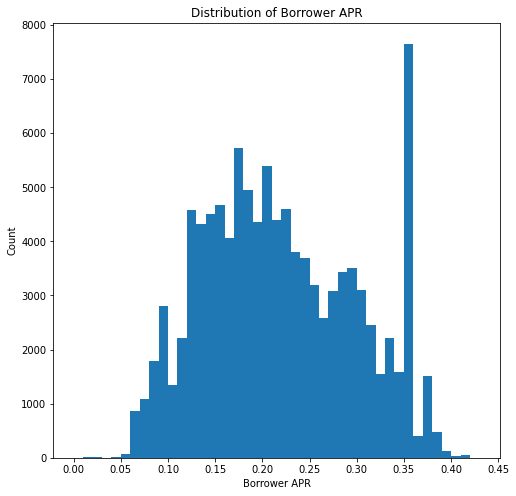

In [14]:
# defining the bins
binsize = 0.01
bins = np.arange(0, loan_data['borrower_APR'].max()+binsize, binsize)

# defining the X ticks
ticksize = 0.05
x_ticks = np.arange(0, loan_data['borrower_APR'].max()+ticksize, ticksize)

# plotting the histogram
draw_histogram(loan_data, 'borrower_APR', bins, x_ticks, 'Borrower APR', 'Count', 'Distribution of Borrower APR', False)

## Distribution of Loan Original Amount

The distribution of the loan amount looks multimodal with peaks between 4k and 5k, 15k and 16k & 10k and 11k in decreasing order.

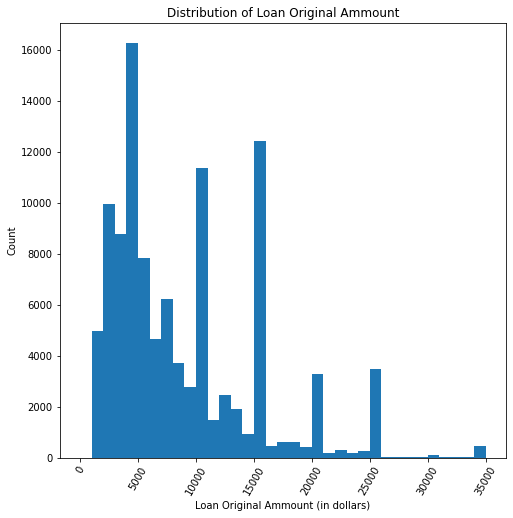

In [15]:
# defining the bins
binsize = 1000
bins = np.arange(0, loan_data['loan_original_amount'].max()+binsize, binsize)

# defining the X ticks
ticksize = 5000
x_ticks = np.arange(0, loan_data['loan_original_amount'].max()+ticksize, ticksize)

# plotting the histogram
draw_histogram(loan_data, 'loan_original_amount', bins, x_ticks, 'Loan Original Ammount (in dollars)', 'Count', 'Distribution of Loan Original Ammount', False, 60)

## Distribution of Prosper Ratings

Many of the records have prosper rating as N/A since the loan origination date was before July 2009. The distribution of the rest of the ratings have an approximate normal distribution.

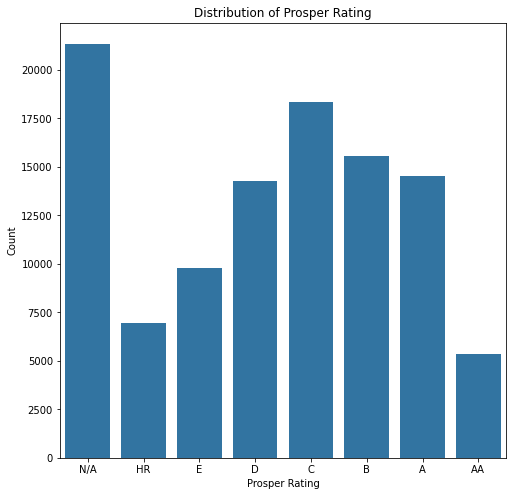

In [16]:
# plotting a countplot to visualize the distribution
draw_countplot(data=loan_data, x='prosper_rating', x_label='Prosper Rating', y_label='Count', title='Distribution of Prosper Rating', ordered=True)

## Loan Original Amount v/s Borrower APR

There is a negative correlation between the loan_original_amount and borrower_APR clearly visible in scatter plot.

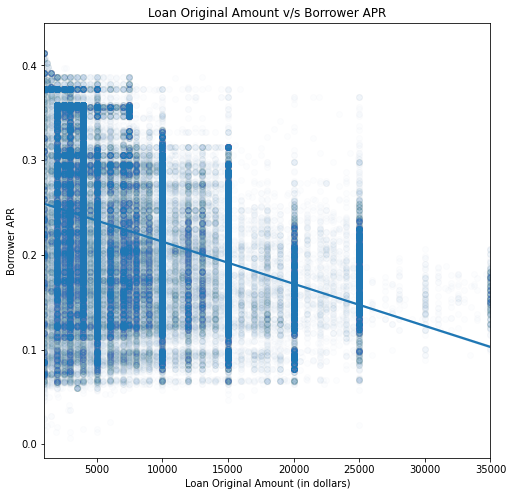

In [17]:
# scatter plot of loan original amount v/s borrower APR
plt.figure(figsize = (8, 8))
sb.regplot(data = loan_data, x = 'loan_original_amount', y = 'borrower_APR', scatter_kws={'alpha':0.01});
plt.xlabel('Loan Original Amount (in dollars)')
plt.ylabel('Borrower APR')
plt.title('Loan Original Amount v/s Borrower APR');

## Effect of Prosper Rating on Loan Original Amount v/s Borrower APR

We can see that the relationship between loan_original_amount and borrower_APR changes from prosper_rating 'HR' to 'AA' from a negative association to a slightly positive one. This could be to encourage people to take larger loans but penalize them when the loan amount is too much.

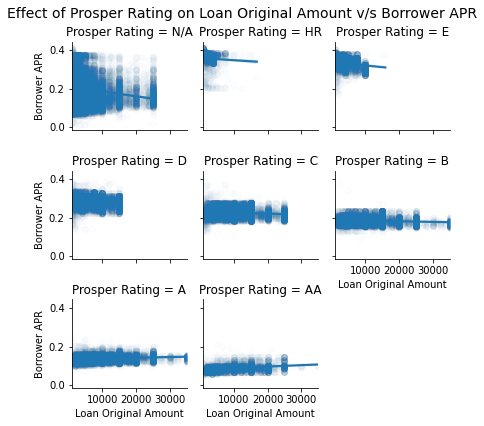

In [18]:
# effect of prosper rating on relationship between borrower APR and original loan amount
g = sb.FacetGrid(data=loan_data, col='prosper_rating', col_wrap=3, height=2)
g.map(sb.regplot, 'loan_original_amount', 'borrower_APR', scatter_kws={'alpha':0.01})

# seting the main plot title
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Effect of Prosper Rating on Loan Original Amount v/s Borrower APR', fontsize=14)

# setting the axes labels
g.axes[0].set_ylabel('Borrower APR')
g.axes[3].set_ylabel('Borrower APR')
g.axes[6].set_ylabel('Borrower APR')
g.axes[5].set_xlabel('Loan Original Amount')
g.axes[6].set_xlabel('Loan Original Amount')
g.axes[7].set_xlabel('Loan Original Amount')

# setting the titles of all sub plots
list_of_prosper_ratings = ['N/A', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA']
plot_no = 0
for prosper_rating in list_of_prosper_ratings:
    g.axes[plot_no].set_title('Prosper Rating = '+prosper_rating)
    plot_no += 1

g.add_legend();

In [19]:
# execute one of these commands as required on the terminal

# to create the slides using the template and serve it on the browser automatically
# jupyter nbconvert explanatory_analysis.ipynb --to slides --post serve --template output_toggle.tpl

# to create the slides using the template
# jupyter nbconvert explanatory_analysis.ipynb --to slides --template output_toggle.tpl

# to create the slides using the default template
# jupyter nbconvert explanatory_analysis.ipynb --to slides

In [20]:
!jupyter nbconvert explanatory_analysis.ipynb --to slides --template output_toggle.tpl